In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sonar.all-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Freq_1   208 non-null    float64
 1   Freq_2   208 non-null    float64
 2   Freq_3   208 non-null    float64
 3   Freq_4   208 non-null    float64
 4   Freq_5   208 non-null    float64
 5   Freq_6   208 non-null    float64
 6   Freq_7   208 non-null    float64
 7   Freq_8   208 non-null    float64
 8   Freq_9   208 non-null    float64
 9   Freq_10  208 non-null    float64
 10  Freq_11  208 non-null    float64
 11  Freq_12  208 non-null    float64
 12  Freq_13  208 non-null    float64
 13  Freq_14  208 non-null    float64
 14  Freq_15  208 non-null    float64
 15  Freq_16  208 non-null    float64
 16  Freq_17  208 non-null    float64
 17  Freq_18  208 non-null    float64
 18  Freq_19  208 non-null    float64
 19  Freq_20  208 non-null    float64
 20  Freq_21  208 non-null    float64
 21  Freq_22  208 non

In [3]:
df.Label

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: Label, Length: 208, dtype: object

In [4]:
df.Label = df.Label.map({"R": 0, "M": 1})

<Axes: >

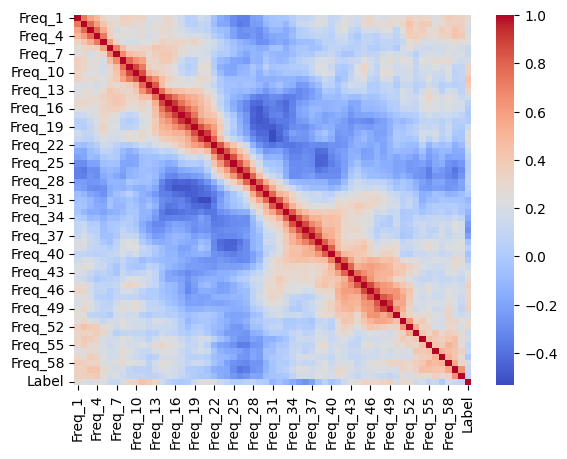

In [5]:
sns.heatmap(df.corr(), cmap='coolwarm')

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop("Label", axis=1)
y = df.Label

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [10]:
scaler = StandardScaler()
knn_model = KNeighborsClassifier()

In [11]:
operations = [('scaler', scaler), ('knn', knn_model)] 

In [12]:
from sklearn.pipeline import Pipeline

In [13]:
pipeline = Pipeline(operations)

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
k = list(range(1,30))

In [16]:
param_grid = {"knn__n_neighbors": k}

In [17]:
full_classifier = GridSearchCV(pipeline, cv=5, param_grid=param_grid, scoring='accuracy')

In [18]:
full_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [19]:
full_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

<Axes: >

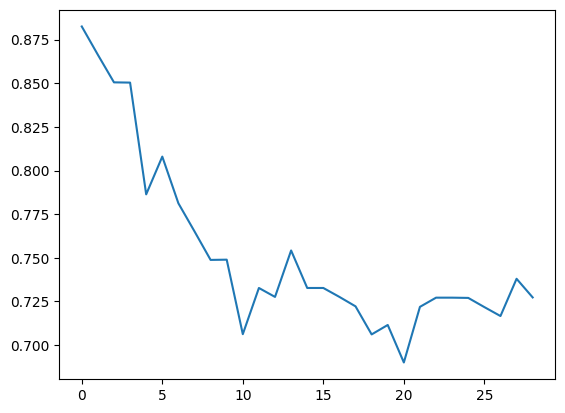

In [20]:
pd.DataFrame(full_classifier.cv_results_)["mean_test_score"].plot()

In [21]:
y_pred = full_classifier.predict(X_test)

<Axes: >

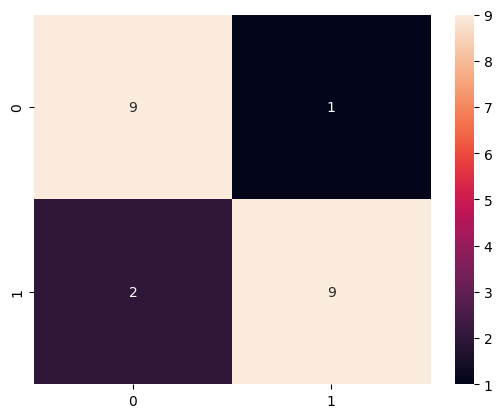

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(confusion_matrix(y_pred=y_pred, y_true=y_test), annot=True)

In [31]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.82      0.86        11

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



In [23]:
from sklearn.linear_model import LogisticRegressionCV

logistic_model = LogisticRegressionCV(cv=5)

In [26]:
scaler_X_train = scaler.fit_transform(X_train)
scaler_X_test = scaler.transform(X_test)

In [25]:
logistic_model.fit(scaler_X_train, y_train)

LogisticRegressionCV(cv=5)

In [27]:
y_logistic_pred = logistic_model.predict(scaler_X_test)

<Axes: >

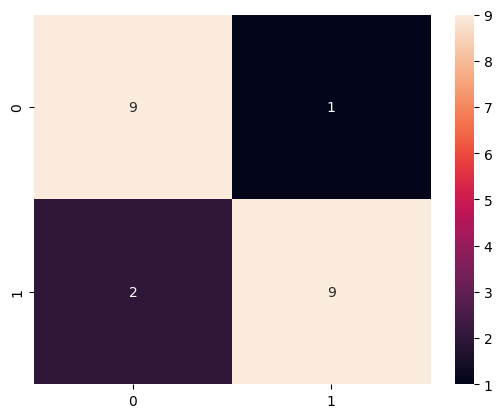

In [28]:
sns.heatmap(confusion_matrix(y_pred=y_logistic_pred, y_true=y_test), annot=True)

In [32]:
print(classification_report(y_true=y_test, y_pred=y_logistic_pred))


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        10
           1       0.90      0.82      0.86        11

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21

